In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cmocean
import xarray as xr
import scipy.io as sio
from math import radians, cos, sin, asin, sqrt
import pylab as pl
from matplotlib.ticker import FormatStrFormatter
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")

In [45]:
def get_Brink(file_fig):#,file_h): #, file_ratio):
    # Brink mode
    file = sio.loadmat(file_fig)
    z, xpl, xxx, zzz, xgr, zgr = file['z'][0,:], file['xpl'][0,:], file['xxx'][0,:], file['zzz'][0,:], file['xgr'], file['zgr']
    k, omega,epe,eke = file['wavenumber'][0][0], file['frequency'][0][0], file['epe'][0][0],file['eke'][0][0]

    # (u is cross-shore and v is alongshore in Brink.)
    p0, u0, v0, w0, r0 = file['p'], file['u'],file['v'], file['wvel'], file['rho']

    #file_rfw = sio.loadmat(file_ratio)
    #R = file_rfw['ratio_for_wave'][0][0]
    #print('ratio for wave', R)
    #print('k (rad/cm) ', k)
    #print('lambda (km) ', ((2*np.pi)/(k*100))*1E-3)
    #print('omega (rad/s) ', omega)
    #print('period (days)', ((2*np.pi)/omega)/(3600*24))
    #print('c (m/s)', (omega/(k*100)))
    scale=0.2
    w = w0.transpose() * 0.01 * scale # cms-1 to ms-1 and normalization (?)
    u = u0.transpose() * 0.01 * scale # cms-1 to ms-1 and normalization 
    v = v0.transpose() * 0.01 * scale # cms-1 to ms-1 and normalization 
    r = r0.transpose() * 1.0 * scale # mg/cm³ to kg/m³ and normalization
    p = p0.transpose() * 0.1 * scale # dyn/cm² to 0.1 Pa (or kg m-1 s-2) and normalization
    
   # hfile=sio.loadmat(file_h)
    #h=hfile['h']
    
    #nn=np.size(h)+2
    #mm=np.size(h)+2
    #xgr = np.zeros((nn-2,mm-2))
    #zgr =  np.zeros((nn-2,mm-2))
    #xmax=max(xpl)
    #xmax = xmax*1.0e05
    #dt = 1/(mm-3)
    #dx = xmax/(nn-3)
    #for n in np.arange(0,nn-2,1):
     #   xtemp = dx*n
      #  xgr[n,:] = (xtemp*np.ones(mm-2))/1e5
       # zgr[n,:] = h[0,n]*(-1+dt*np.arange(0,mm-2,1))/100
    
    #z[0:-1]=-np.log10(-z[0:-1])
    #zzz=-np.log10(-zzz)
    
    return(u,v,w,r,p,z,k,omega,xpl, xxx, zzz,zgr.transpose(),xgr.transpose(), epe, eke)

def plotbrink(ax,grid_X,grid_Z,levelsb,xlab,ylab,nr,varbrink,modes,lat,t):
    ax.set_facecolor('tan')
    cax=ax.contourf(grid_X,grid_Z,varbrink ,cmap=cmocean.cm.delta,levels=levelsb)
    ax.contour(grid_X,grid_Z,varbrink , levels=[0], linewidths=2, 
                linestyles='-', colors='k', zorder=2)
   
    if nr<=-1:
        ax.set_title(f'MITgcm cross-section \n Day {t}', fontdict={'fontsize': 15})
        if nr==-1:    
            ax.set(ylabel=ylab)
        else: 
            ax.tick_params(axis='y',which='both', left=True, right=False, labelleft=False) 
        ax.tick_params(axis='x',which='both', bottom=True, top=False, labelbottom=False)
    else:
        ax.set_title(f'Mode {nr+1}')
        if nr>=modes-3:
            ax.set(xlabel=xlab)
        else:
            ax.tick_params(axis='x',which='both', bottom=True, top=False, labelbottom=False)
        if (nr % 2) != 0:
            ax.tick_params(axis='y',which='both', left=True, right=False, labelleft=False) # labels along the bottom edge are off
        else: 
            ax.set(ylabel=ylab)
            
    return cax

In [3]:
u,v0,w0,r,p0,z,k0,omega0,xpl, xxx, zzz, zgr, xgr, epe0, eke0= get_Brink('Crossects/dataSVB32.68mode0.mat')
u,v1,w1,r,p1,z,k1,omega1,xpl, xxx, zzz, zgr, xgr, epe1, eke1= get_Brink('Crossects/dataSVB32.68mode1.mat')
u,v2,w2,r,p2,z,k2,omega2,xpl, xxx, zzz, zgr, xgr, epe2, eke2= get_Brink('Crossects/dataSVB32.68mode2.mat')
u,v3,w3,r,p3,z,k3,omega3,xpl, xxx, zzz, zgr, xgr, epe3, eke3= get_Brink('Crossects/dataSVB32.68mode3.mat')
u,v4,w4,r,p4,z,k4,omega4,xpl, xxx, zzz, zgr, xgr, epe4, eke4= get_Brink('Crossects/dataSVB32.68mode4.mat')
u,v5,w5,r,p5,z,k5,omega5,xpl, xxx, zzz, zgr, xgr, epe5, eke5= get_Brink('Crossects/dataSVB32.68mode5.mat')
u,v6,w6,r,p6,z,k6,omega6,xpl, xxx, zzz, zgr, xgr, epe6, eke6= get_Brink('Crossects/dataSVB32.68mode9.mat')

u,v0,w0,r,p09,z,k0,omega0,xpl, xxx, zzz, zgr9, xgr9, epe0, eke0= get_Brink('Crossects/dataSVB32.98mode0.mat')
u,v1,w1,r,p19,z,k1,omega1,xpl, xxx, zzz, zgr9, xgr9, epe1, eke1= get_Brink('Crossects/dataSVB32.98mode1.mat')
u,v2,w2,r,p29,z,k2,omega2,xpl, xxx, zzz, zgr9, xgr9, epe2, eke2= get_Brink('Crossects/dataSVB32.98mode2.mat')
u,v3,w3,r,p39,z,k3,omega3,xpl, xxx, zzz, zgr9, xgr9, epe3, eke3= get_Brink('Crossects/dataSVB32.98mode3.mat')
u,v4,w4,r,p49,z,k4,omega4,xpl, xxx, zzz, zgr9, xgr9, epe4, eke4= get_Brink('Crossects/dataSVB32.98mode4.mat')




In [4]:
ds3268=xr.open_dataset('Crossects/LinReg3268FILT.nc')

TIME=ds3268.time.values
VALMIT68=ds3268.valmit.values
grid_X68=ds3268.gridX
grid_Z68=ds3268.gridZ


In [5]:
ds3298=xr.open_dataset('Crossects/LinReg3298FILT.nc')

TIME=ds3298.time.values
VALMIT98=ds3298.valmit.values
grid_X98=ds3298.gridX
grid_Z98=ds3298.gridZ


In [10]:
params = {'font.size': 16,
          'figure.figsize': (10, 15),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

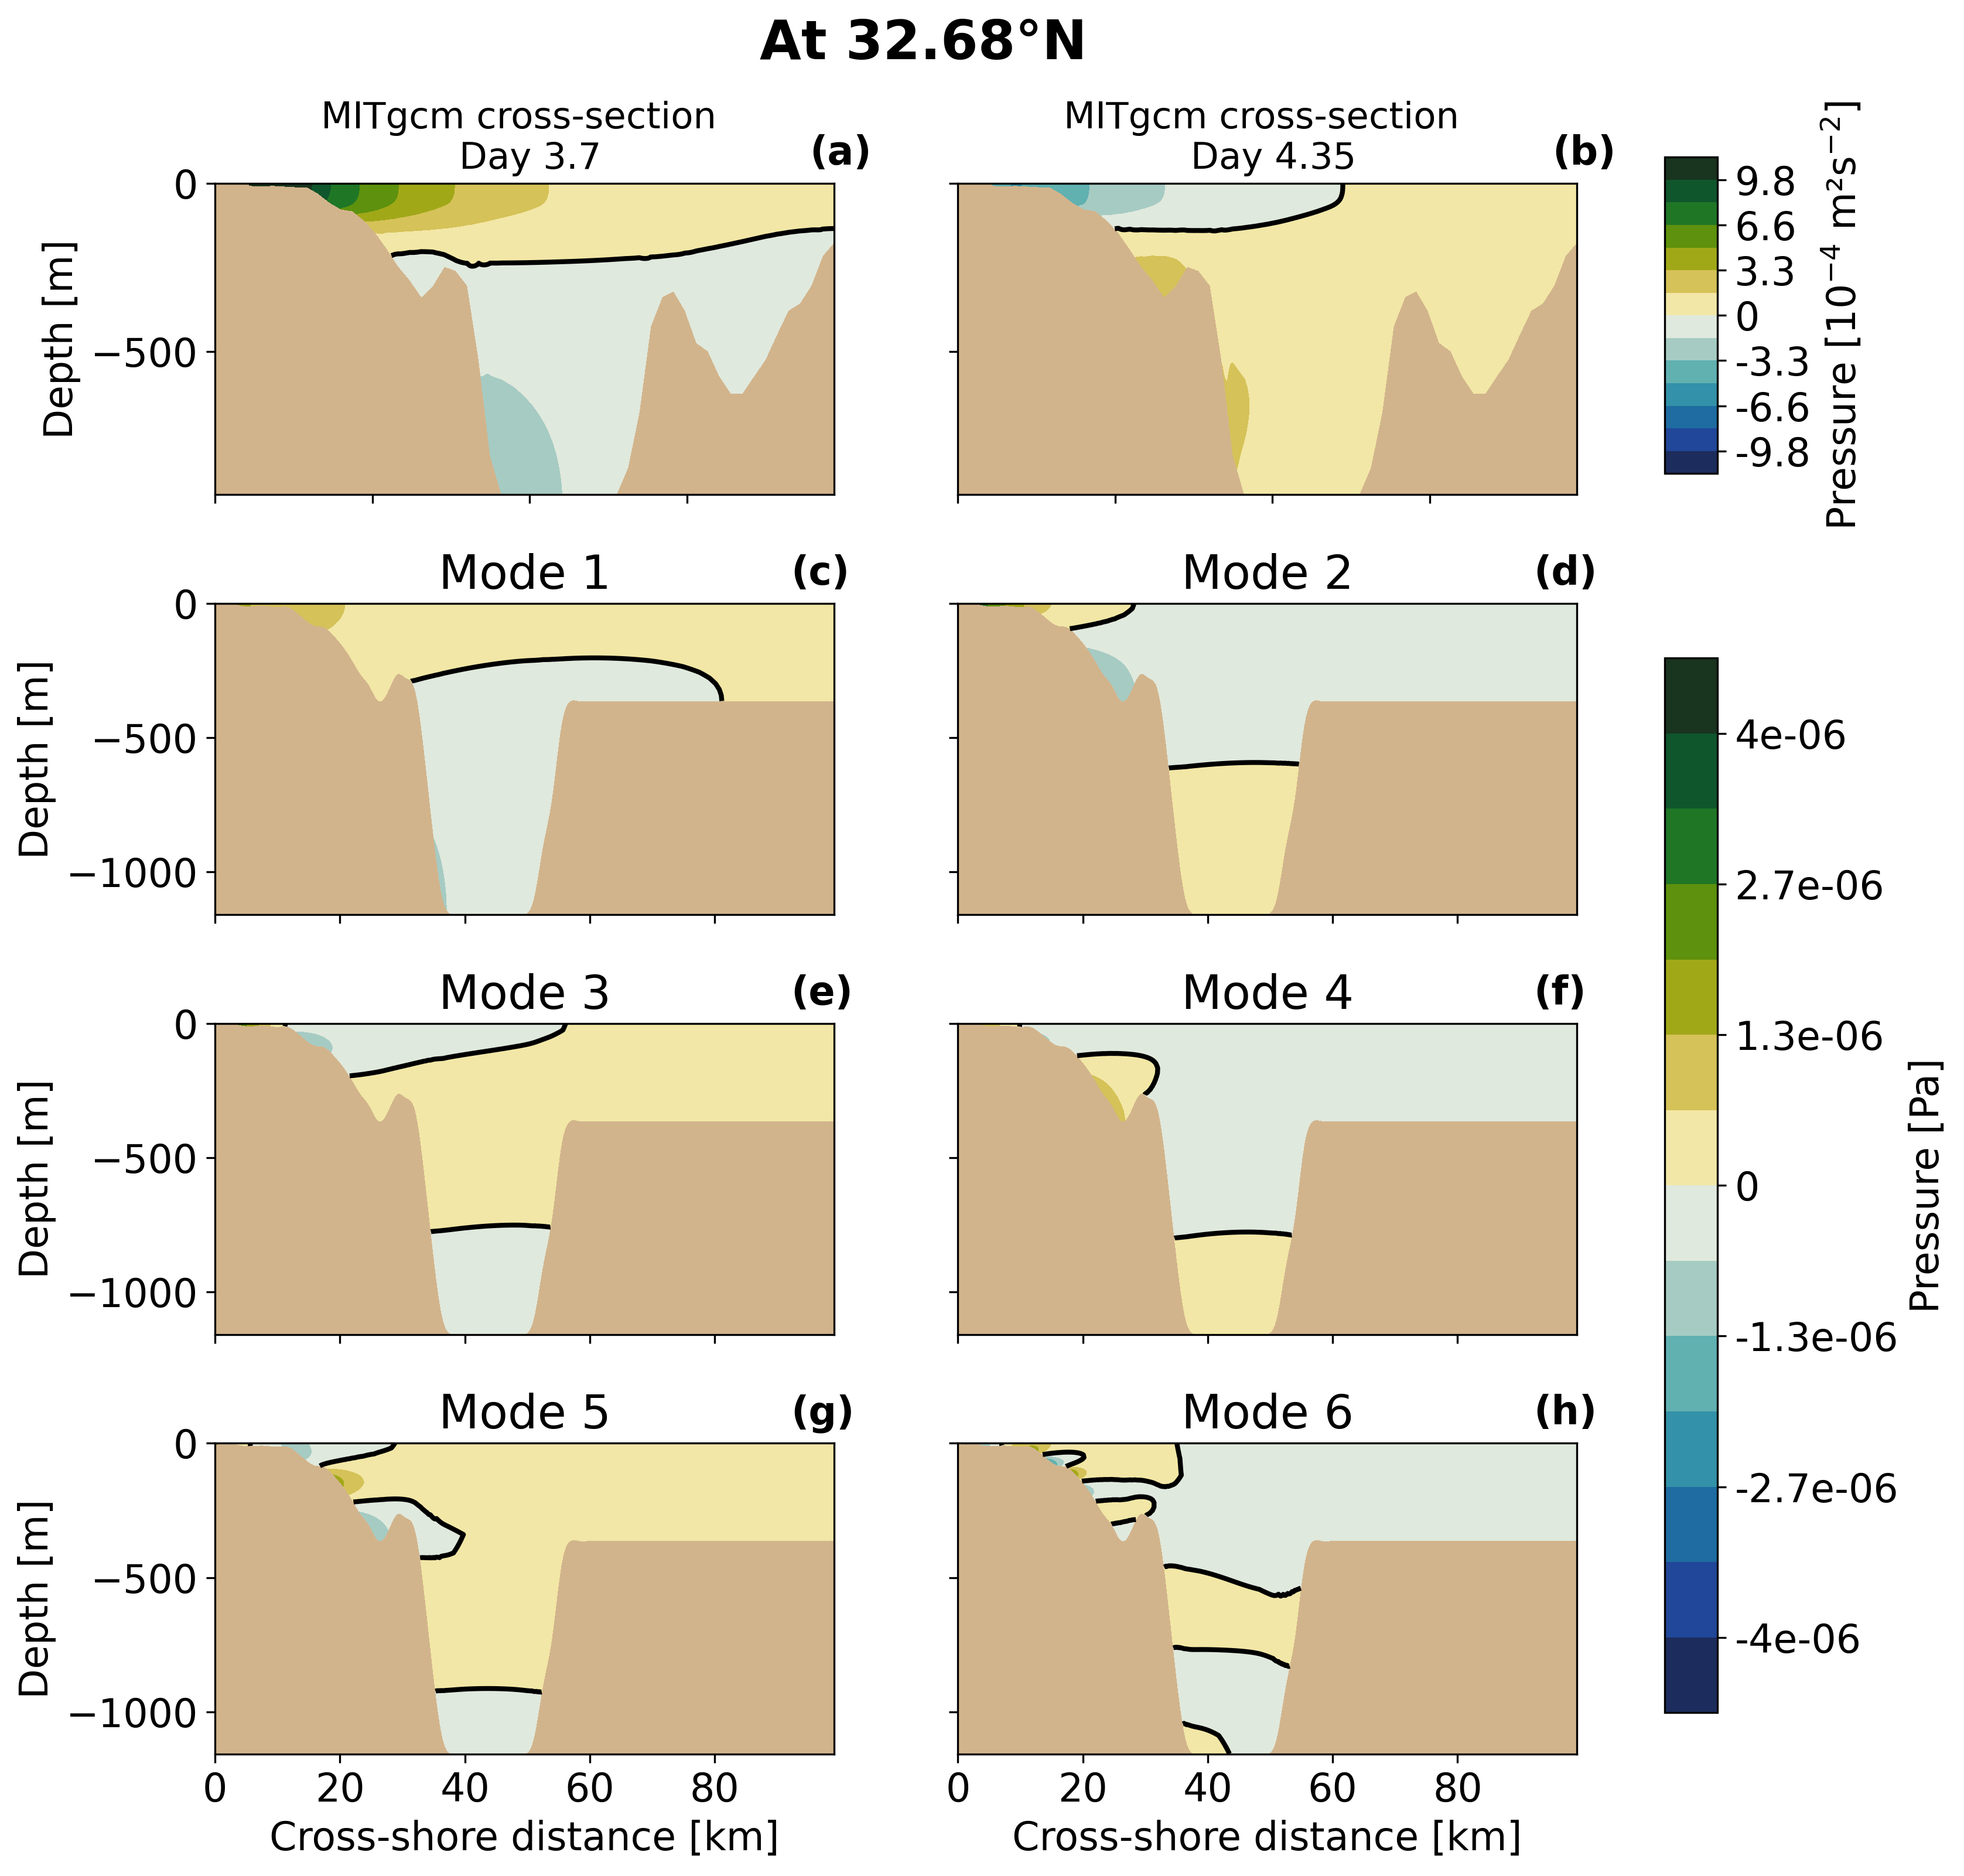

In [71]:
vals=np.array([p0, p1, p2, p3, p4,p5,p6])


vminb=-np.nanmax(abs(vals))
vmaxb=np.nanmax(abs(vals))

levelsb=np.linspace(vminb,vmaxb,15)

day1=3.7
day2=4.35

lat=32.68

t=np.where(TIME>=day1*60*24)[0][0]
vmin=-np.nanmax(abs(VALMIT68[t]))*1e4
vmax=np.nanmax(abs(VALMIT68[t]))*1e4

levels=np.linspace(vmin,vmax,15)

t2=np.where(TIME>=day2*60*24)[0][0]

xlab='Cross-shore distance [km]'
ylab='Depth [m]'
modes=len(vals[:,1,1])
    
fig = plt.figure(tight_layout=True)
if modes<=4:
    gs = GridSpec(nrows=3, ncols=2, height_ratios=[1,1,1],hspace=0.35)
elif modes<=6:
    gs = GridSpec(nrows=4, ncols=2, height_ratios=[1,1,1,1],hspace=0.35)
elif modes<=8:
    gs = GridSpec(nrows=5, ncols=2, height_ratios=[1,1,1,1,1],hspace=0.35)

   
    
ax = fig.add_subplot(gs[0, 0])
ax.text(0.88, 1.4, 'At 32.68°N', fontweight='bold', fontsize=22,color='k', 
                transform=ax.transAxes)
cax1=plotbrink(ax,grid_X68,grid_Z68,levels,xlab,ylab,-1,VALMIT68[t]*1e4,modes,lat,day1)
ax.text(0.96, 1.06, '(a)', fontweight='bold', color='k', 
            transform=ax.transAxes)
ax = fig.add_subplot(gs[0, 1])
cax1=plotbrink(ax,grid_X68,grid_Z68,levels,xlab,ylab,-2,VALMIT68[t2]*1e4,modes,lat,day2)

cbar_ax1 = fig.add_axes([0.95, 0.77, 0.03, 0.12])
fig.colorbar(cax1, cax=cbar_ax1)
cbar_ax1.set_ylabel('Pressure [$10^{-4}$ m²s$^{-2}$]')
cbar_ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2g'))

ax.text(0.96, 1.06, '(b)', fontweight='bold', color='k', 
            transform=ax.transAxes)


for i in np.arange(0,modes-1,1):
        if i<=1:
            ax = fig.add_subplot(gs[1, i])
            if i==1:
                ax.text(0.93, 1.06, '(d)', fontweight='bold', color='k', 
                transform=ax.transAxes)
            else:
                ax.text(0.93, 1.06, '(c)', fontweight='bold', color='k', 
                transform=ax.transAxes)
        elif i<=3:
            ax = fig.add_subplot(gs[2, i-2])
            if i ==2:
                ax.text(0.93, 1.06, '(e)', fontweight='bold', color='k', 
                transform=ax.transAxes)
            else: 
                ax.text(0.93, 1.06, '(f)', fontweight='bold', color='k', 
                transform=ax.transAxes)
        elif i<=5:
            ax = fig.add_subplot(gs[3, i-4])
            if i==4:
                ax.text(0.93, 1.06, '(g)', fontweight='bold', color='k', 
                transform=ax.transAxes)
            else:
                ax.text(0.93, 1.06, '(h)', fontweight='bold', color='k', 
                transform=ax.transAxes)
        elif i<=6:
            ax = fig.add_subplot(gs[4, i-5])
        cax2=plotbrink(ax,xgr,zgr,levelsb,xlab,ylab,i,vals[i+1],modes,lat,day1)

cbar_ax = fig.add_axes([0.95, 0.3, 0.03, 0.4])
fig.colorbar(cax2, cax=cbar_ax)
cbar_ax.set_ylabel('Pressure [Pa]')
cbar_ax.yaxis.set_major_formatter(FormatStrFormatter('%.2g'))
   
fig.tight_layout()
#print(f'period (days) {(2*np.pi)/omega/(3600*24)}')
#print(f'c (m/s) {omega/(k*100)}')
#print(f'R=EKE/EPE {(eke/epe)}')

In [8]:
params = {'font.size': 16,
          'figure.figsize': (10, 12),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [33]:
TIME[np.where(TIME>=day1*60*24)[0][0]]/(60*24)

4.0

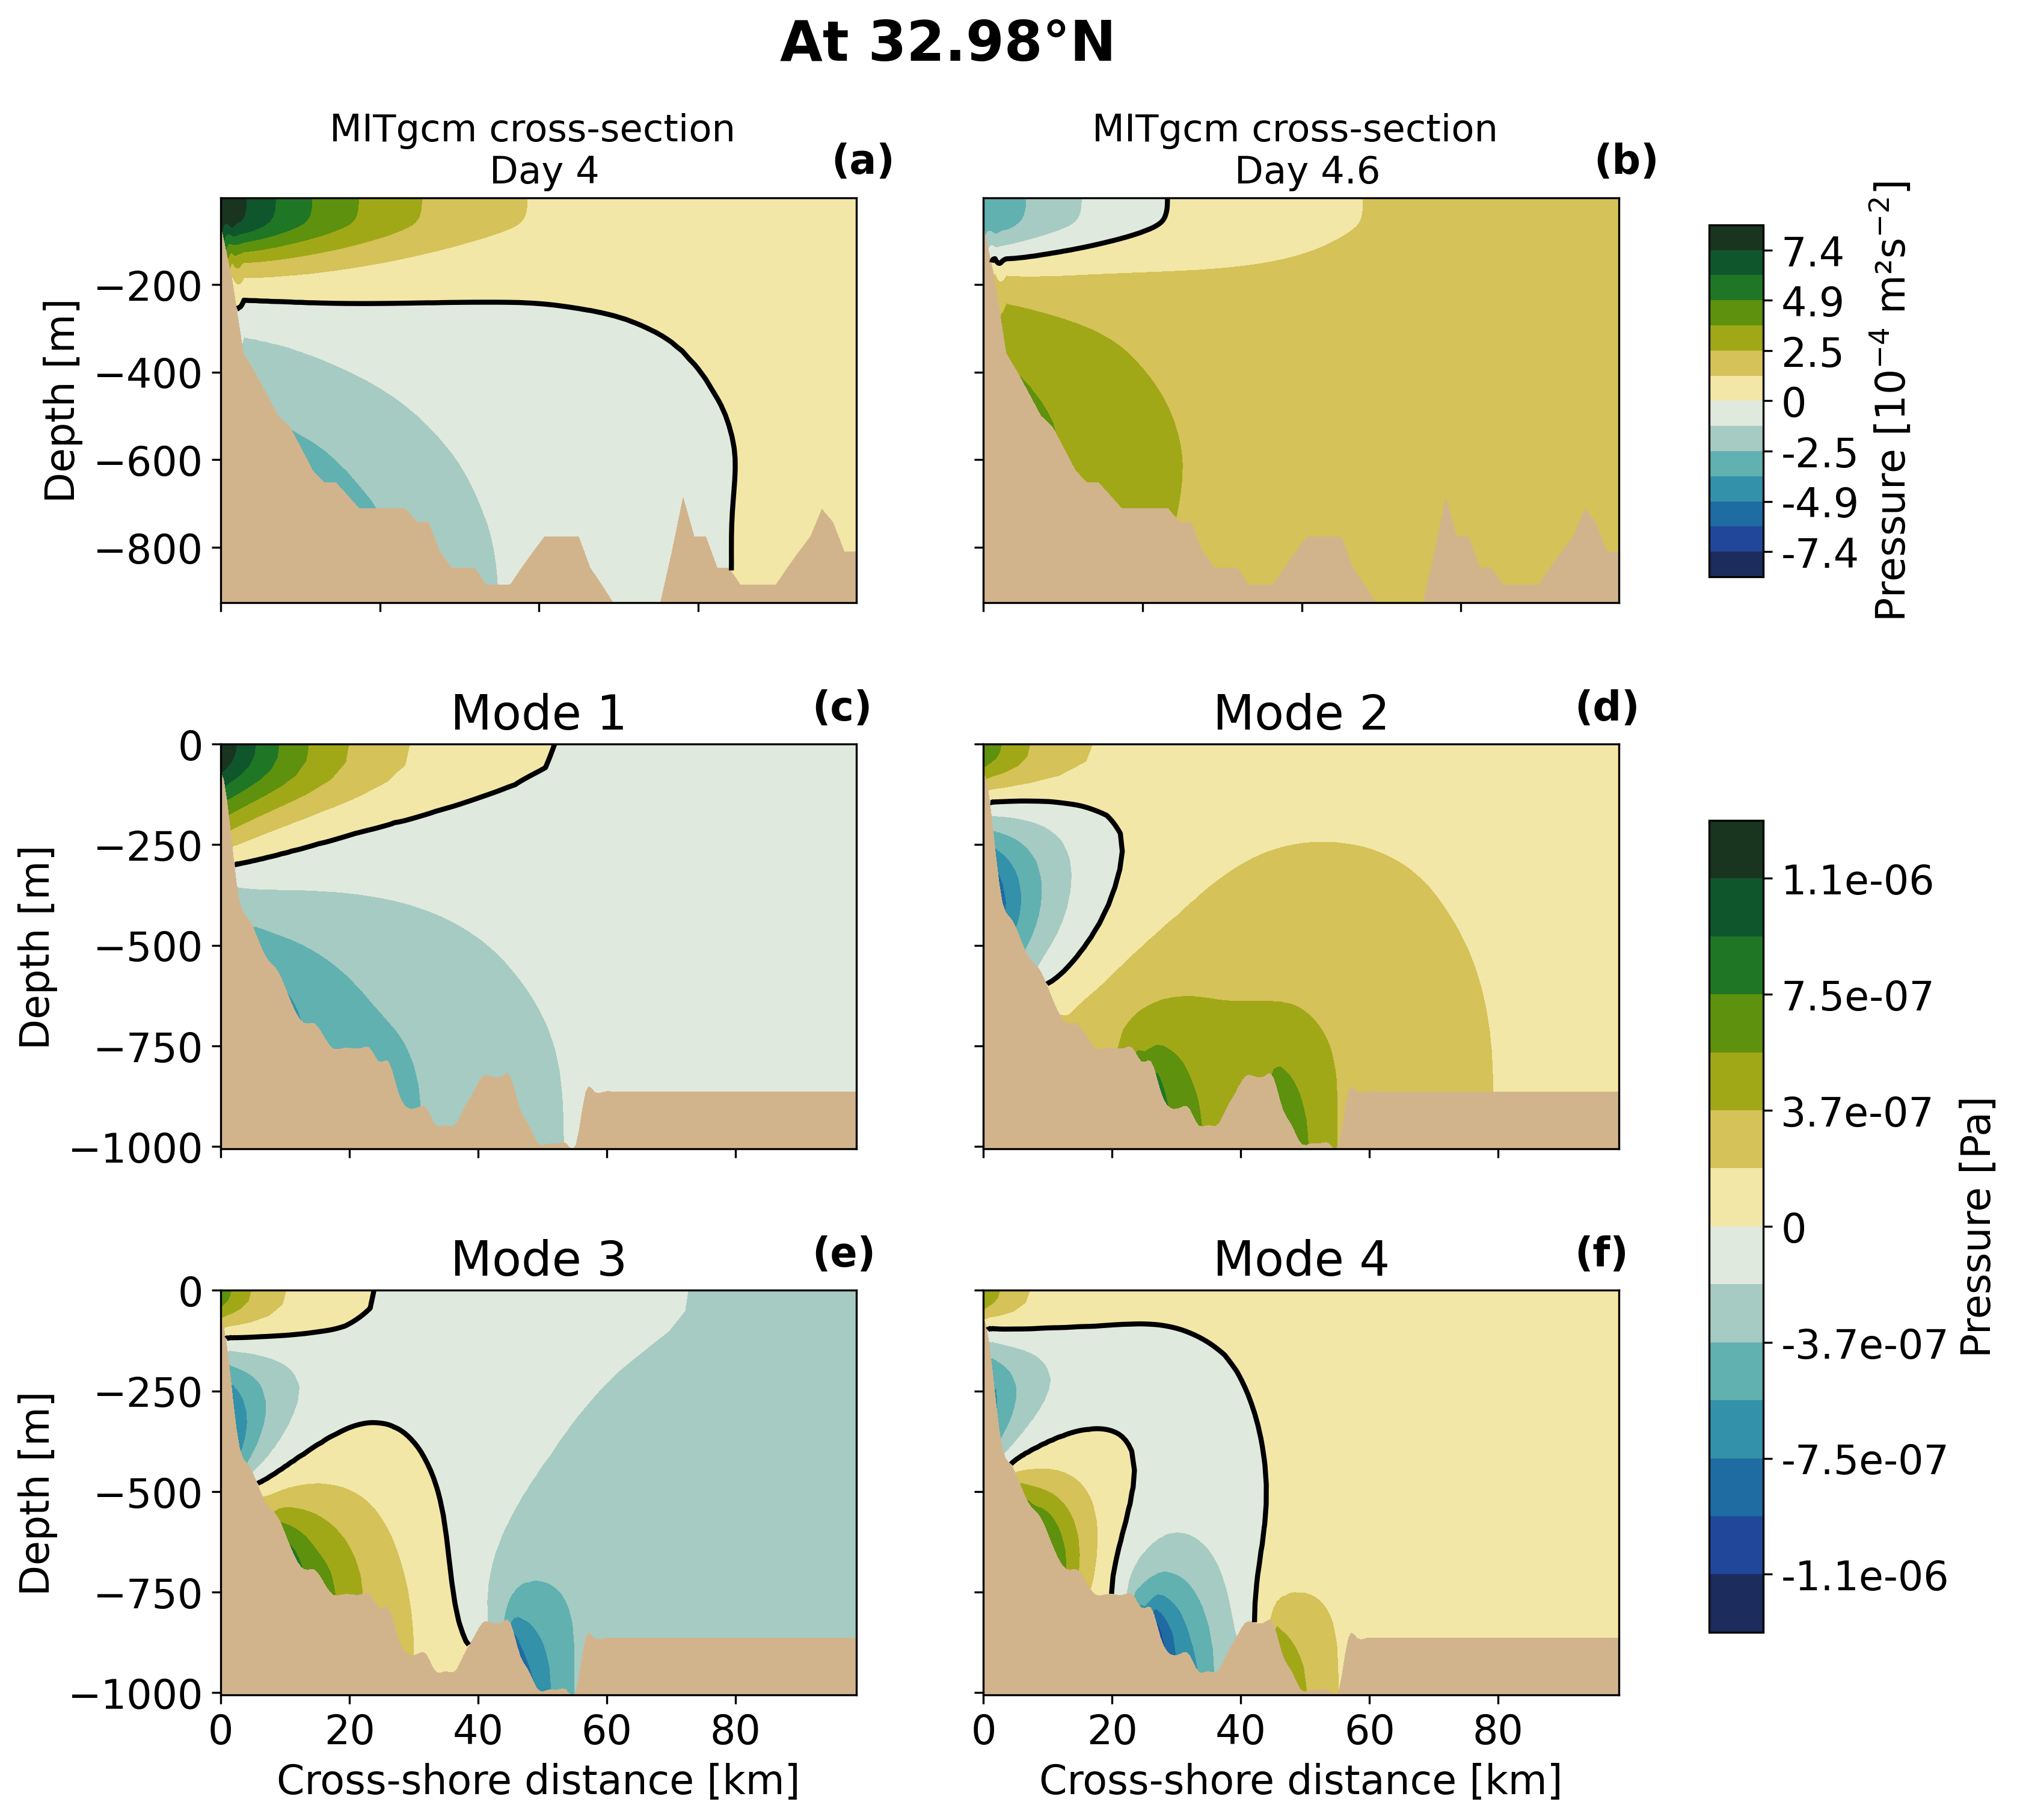

In [73]:
vals=np.array([p09, p19, p29, p39, p49])

vminb=-np.nanmax(abs(vals))
vmaxb=np.nanmax(abs(vals))

levelsb=np.linspace(vminb,vmaxb,15)

day1=4
day2=4.6

lat=32.98

t=np.where(TIME>=day1*60*24)[0][0]

t2=np.where(TIME>=day2*60*24)[0][0]

vmin=-np.nanmax(abs(VALMIT98[t]))*1e4
vmax=np.nanmax(abs(VALMIT98[t]))*1e4

levels=np.linspace(vmin,vmax,15)


xlab='Cross-shore distance [km]'
ylab='Depth [m]'
modes=len(vals[:,1,1])
    
fig = plt.figure(tight_layout=True)
if modes<=4:
    gs = GridSpec(nrows=3, ncols=2, height_ratios=[1,1,1],hspace=0.35)
elif modes<=6:
    gs = GridSpec(nrows=4, ncols=2, height_ratios=[1,1,1,1],hspace=0.35)
elif modes<=8:
    gs = GridSpec(nrows=5, ncols=2, height_ratios=[1,1,1,1,1],hspace=0.35)

ax = fig.add_subplot(gs[0, 0])
ax.text(0.88, 1.34, 'At 32.98°N', fontweight='bold', fontsize=22,color='k', 
                transform=ax.transAxes)
cax1=plotbrink(ax,grid_X98,grid_Z98,levels,xlab,ylab,-1,VALMIT98[t]*1e4,modes,lat,day1)
ax.text(0.96, 1.06, '(a)', fontweight='bold', color='k', 
            transform=ax.transAxes)
ax = fig.add_subplot(gs[0, 1])
cax1=plotbrink(ax,grid_X98,grid_Z98,levels,xlab,ylab,-2,VALMIT98[t2]*1e4,modes,lat,day2)

cbar_ax1 = fig.add_axes([0.95, 0.74, 0.03, 0.13])
fig.colorbar(cax1, cax=cbar_ax1)
cbar_ax1.set_ylabel('Pressure [$10^{-4}$ m²s$^{-2}$]')
cbar_ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2g'))

ax.text(0.96, 1.06, '(b)', fontweight='bold', color='k', 
            transform=ax.transAxes)


for i in np.arange(0,modes-1,1):
        if i<=1:
            ax = fig.add_subplot(gs[1, i])
            if i==1:
                ax.text(0.93, 1.06, '(d)', fontweight='bold', color='k', 
                transform=ax.transAxes)
            else:
                ax.text(0.93, 1.06, '(c)', fontweight='bold', color='k', 
                transform=ax.transAxes)
        elif i<=3:
            ax = fig.add_subplot(gs[2, i-2])
            if i ==2:
                ax.text(0.93, 1.06, '(e)', fontweight='bold', color='k', 
                transform=ax.transAxes)
            else: 
                ax.text(0.93, 1.06, '(f)', fontweight='bold', color='k', 
                transform=ax.transAxes)
        elif i<=5:
            ax = fig.add_subplot(gs[3, i-4])
            if i==4:
                ax.text(0.93, 1.06, '(g)', fontweight='bold', color='k', 
                transform=ax.transAxes)
            else:
                ax.text(0.93, 1.06, '(h)', fontweight='bold', color='k', 
                transform=ax.transAxes)
        elif i<=6:
            ax = fig.add_subplot(gs[4, i-5])
        cax2=plotbrink(ax,xgr9,zgr9,levelsb,xlab,ylab,i,vals[i+1],modes,lat,day1)

cbar_ax = fig.add_axes([0.95, 0.35, 0.03, 0.3])
fig.colorbar(cax2, cax=cbar_ax)
cbar_ax.set_ylabel('Pressure [Pa]')
cbar_ax.yaxis.set_major_formatter(FormatStrFormatter('%.2g'))
   
fig.tight_layout()
#print(f'period (days) {(2*np.pi)/omega/(3600*24)}')
#print(f'c (m/s) {omega/(k*100)}')
#print(f'R=EKE/EPE {(eke/epe)}')

In [8]:
params = {'font.size': 24,
          'figure.figsize': (11, 13),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [22]:
zpi,xpi=np.where(VALFIT[i,:,:]<100)
valbrink1=ds3268.varbrink.values[0]
valbrink2=ds3268.varbrink.values[1]
valbrink3=ds3268.varbrink.values[2]
valbrink4=ds3268.varbrink.values[3]
valbrink5=ds3268.varbrink.values[4]
valbrink6=ds3268.varbrink.values[5]

valin=np.vstack((valbrink1[zpi,xpi],valbrink2[zpi,xpi],valbrink3[zpi,xpi],valbrink4[zpi,xpi],valbrink5[zpi,xpi],valbrink6[zpi,xpi]))

In [20]:
VALFIT=ds3268.valfit.values
beta3268=ds3268.betas.values

In [210]:
params = {'font.size': 16,
          'figure.figsize': (10, 5),
         'font.family':'sans'}
pl.rcParams.update(params)

In [29]:
corr=np.zeros((len(VALFIT[:,0,0]),6))

for i in np.arange(0,len(VALFIT[:,0,0]),1):
    
    corrmat=np.corrcoef(VALFIT[i,zpi,xpi],VALMIT[i,zpi,xpi],rowvar=False)
    corr[i]=corrmat[-1,:-1]